<a href="https://colab.research.google.com/github/anseeafatima/week1-image-classifier/blob/main/day3_first_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Helper function to show images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize (since we normalized earlier)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap="gray")
    plt.show()


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Define a simple neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)   # input layer (784) → hidden layer (128)
        self.fc2 = nn.Linear(128, 64)      # hidden layer → hidden layer
        self.fc3 = nn.Linear(64, 10)       # hidden layer → output (10 classes)

    def forward(self, x):
        x = x.view(-1, 28*28)   # flatten 28x28 images into 784 vector
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [3]:
import torchvision
import torchvision.transforms as transforms

# Transform images to tensors + normalize
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 38.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.00MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.31MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.59MB/s]


In [4]:
# Define loss function & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Training loop (1 epoch for demo)
for epoch in range(1):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()   # clear gradients
        outputs = net(inputs)   # forward pass
        loss = criterion(outputs, labels)   # compute loss
        loss.backward()         # backprop
        optimizer.step()        # update weights

        running_loss += loss.item()
        if i % 1000 == 999:    # print every 1000 mini-batches
            print(f"[{epoch+1}, {i+1}] loss: {running_loss/1000:.3f}")
            running_loss = 0.0

print("Training finished ✅")


[1, 1000] loss: 1.294
[1, 2000] loss: 1.010
[1, 3000] loss: 0.937
[1, 4000] loss: 0.949
[1, 5000] loss: 1.016
[1, 6000] loss: 1.036
[1, 7000] loss: 1.056
[1, 8000] loss: 1.230
[1, 9000] loss: 1.910
[1, 10000] loss: 2.390
[1, 11000] loss: 2.307
[1, 12000] loss: 2.328
[1, 13000] loss: 2.307
[1, 14000] loss: 2.307
[1, 15000] loss: 2.307
Training finished ✅


In [5]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on 10,000 test images: {100 * correct / total:.2f}%")



Accuracy on 10,000 test images: 9.58%


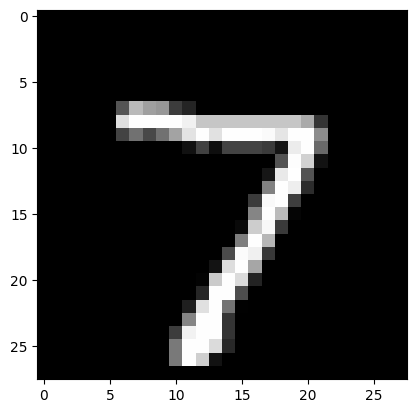

Predicted: 6 | Actual: 7


In [10]:
dataiter = iter(testloader)
images, labels = next(dataiter)

outputs = net(images)
_, predicted = torch.max(outputs, 1)

imshow(images[0])  # reuse imshow from Day 2
print("Predicted:", predicted[0].item(), "| Actual:", labels[0].item())
